## Data Pre-Processing

In [3]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importing dataset
dataset = pd.read_csv('datasets/full.csv')

# Separate dataset (X) and dependent vector (y)
X = dataset.filter(items=['Age'])
y = dataset.filter(items=['Survived'])

# Handle Missing values
## Filling missing
X.fillna(X.mean(), inplace=True)

# Splitting Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc_X.transform(X_test), columns=X_train.columns)
sc_y = StandardScaler()
y_train = pd.DataFrame(sc_y.fit_transform(y_train), columns=y_train.columns)
y_test = pd.DataFrame(sc_y.fit_transform(y_test), columns=y_train.columns)

## SVR

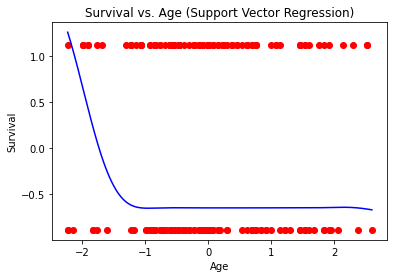

In [4]:
# Fitting SVR to dataset
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Visualize result of support vector regression
X_test_interp = np.arange(X_test['Age'].min(), X_test['Age'].max(), 0.01)
X_test_interp = X_test_interp.reshape(-1, 1)
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test_interp, svr.predict(X_test_interp), color='blue')
plt.title('Survival vs. Age (Support Vector Regression)')
plt.xlabel('Age')
plt.ylabel('Survival')
plt.show()
